# Data Exploration

In [1]:
# !pip install matplotlib_scalebar

# Modeling

Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 96 rows, 84 columns and 348 nonzeros
Model fingerprint: 0xca5b94eb
Variable types: 12 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [5e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
Route for vehicle 0: [(4, 4)]
Route for vehicle 1: [(0, 0), (1, 1), (2, 2), (3, 3), (5, 5)]


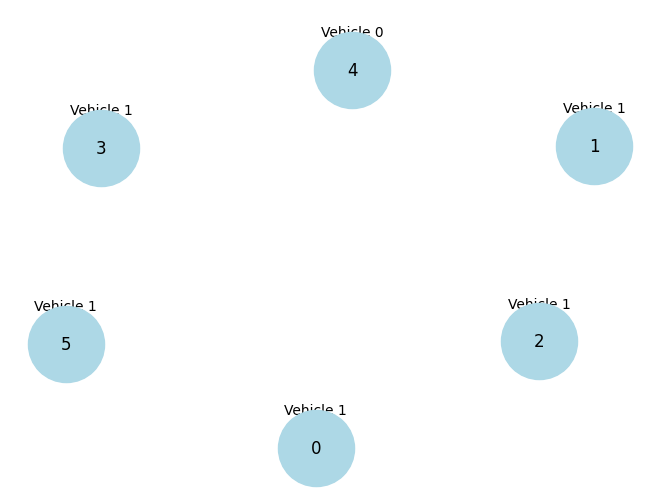

In [2]:
from optimization_model.vrp_tw import VRPTWData, VRPTWModel, VRPNetworkPlot
# Instantiate and solve the problem# Instantiate and solve the problem
data = VRPTWData()
vrp_model = VRPTWModel(data)
vrp_model.solve()
vrp_model.print_solution()

# Plot the solution
plot = VRPNetworkPlot(data, vrp_model.vehicle_routes)
plot.create_graph()
plot.draw()


In [3]:
import numpy as np
from scipy.spatial import distance_matrix

# Define coordinates for the depot and 20 customers
np.random.seed(42)
coordinates = np.random.rand(21, 2) * 100  # Random points in a 100x100 area

# Calculate the distance matrix
distance_matrix = distance_matrix(coordinates, coordinates)

# Convert to integer type
distance_matrix = distance_matrix.astype(int)

print("Distance Matrix:")
print(distance_matrix)


Distance Matrix:
[[  0  50  82  32  33  35  86  79  43  66  84  59  18  47  93  81  30  60
   85  59  52]
 [ 50   0  72  72  17  80  39  68  43  42  47  49  33  53  56  44  75  31
   65  16  61]
 [ 82  72   0  71  70  82  67   3  39  30  45  25  69  36  44  45  79 103
   15  59  34]
 [ 32  72  71   0  56  11 101  69  42  68  91  55  40  37  97  88   8  90
   80  75  37]
 [ 33  17  70  56   0  63  54  67  34  44  56  46  16  44  66  53  58  37
   67  28  52]
 [ 35  80  82  11  63   0 111  80  52  79 101  66  47  48 108  99   4  95
   91  84  48]
 [ 86  39  67 101  54 111   0  65  61  40  23  56  68  70  29  22 106  61
   54  27  76]
 [ 79  68   3  69  67  80  65   0  36  27  43  21  66  33  43  42  77 100
   14  56  31]
 [ 43  43  39  42  34  52  61  36   0  26  49  15  30  10  55  46  48  71
   42  38  18]
 [ 66  42  30  68  44  79  40  27  26   0  23  15  49  32  29  21  75  74
   23  29  37]
 [ 84  47  45  91  56 101  23  43  49  23   0  39  66  55   9   3  97  75
   31  30  60]
 [ 5

# Experimenting models

Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20 rows, 36 columns and 100 nonzeros
Model fingerprint: 0xbfca27c0
Variable types: 0 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [8e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 20 rows and 36 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 450 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.500000000000e+02, best bound 4.500000000000e+02, gap 0.0000%


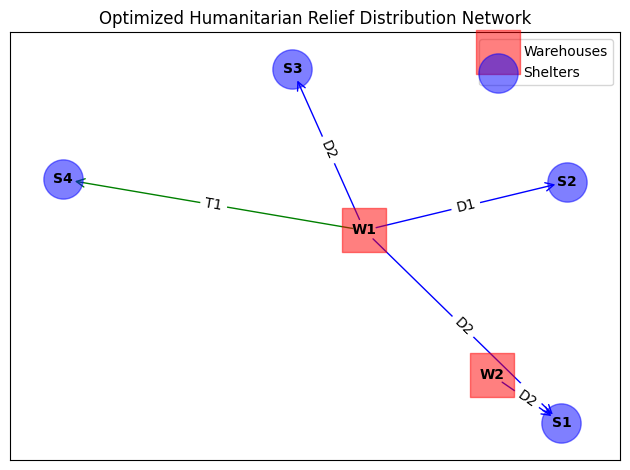

In [1]:
from optimization_model.vrp_humanitarian import HumanitarianReliefVRP, ReliefNetwork
# Define your data
warehouses = ['W1', 'W2']
shelters = ['S1', 'S2', 'S3', 'S4']
drones = ['D1', 'D2']
trucks = ['T1', 'T2']
vehicles = drones + trucks

distances = {('W1', 'S1'): 10, ('W1', 'S2'): 20, ('W1', 'S3'): 15, ('W1', 'S4'): 30,
             ('W2', 'S1'): 25, ('W2', 'S2'): 30, ('W2', 'S3'): 20, ('W2', 'S4'): 10}
demands = {'S1': 5, 'S2': 7, 'S3': 3, 'S4': 4}
capacities = {'D1': 10, 'D2': 10, 'T1': 20, 'T2': 20}
ranges = {'D1': 25, 'D2': 25, 'T1': 50, 'T2': 50}
population = {'S1': 100, 'S2': 150, 'S3': 80, 'S4': 120}

# Instantiate and solve the optimization model
vrp_model = HumanitarianReliefVRP(warehouses, shelters, vehicles, distances, demands, capacities, ranges, population)
vrp_model.build_model()
vrp_model.solve()

# Get the optimized routes
routes = vrp_model.get_routes()

# Instantiate and plot the network
relief_network = ReliefNetwork()
relief_network.add_routes(routes)
relief_network.plot_network()


# Application